# Fashion MNIST dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

![](fashion_mnist_dataset_sample.png)


### Data Description

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
* The training and test data sets have 785 columns.
* The first column consists of the class labels (see above), and represents the article of clothing.
* The rest of the columns contain the pixel-values of the associated image.

### Labels

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

TL;DR

* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

### Acknowledgements

* Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

* Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from tensorflow import keras
import cv2

import itertools

Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Convert gray scale image into RGB format

In [3]:
dim = (48, 48)

#convert 28x28 grayscale to 224x224 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

rgb_list_1 = []
#convert train_images data to 224x224 rgb values
for i in range(len(train_images)):
    rgb_1 = to_rgb(train_images[i])
    rgb_list_1.append(rgb_1)
    #print(rgb.shape)
    
rgb_arr_1 = np.stack([rgb_list_1],axis=4)
rgb_arr_to_3d_1 = np.squeeze(rgb_arr_1, axis=4)
print(rgb_arr_to_3d_1.shape)

(60000, 48, 48, 3)


In [4]:
rgb_list_2 = []
#convert test_images data to 224x224 rgb values
for i in range(len(test_images)):
    rgb_2 = to_rgb(test_images[i])
    rgb_list_2.append(rgb_2)
    #print(rgb_2.shape)
    
rgb_arr_2 = np.stack([rgb_list_2],axis=4)
rgb_arr_to_3d_2 = np.squeeze(rgb_arr_2, axis=4)
print(rgb_arr_to_3d_2.shape)

(10000, 48, 48, 3)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [36]:
num_classes = len(class_names)
print(num_classes)

10


In [37]:
from keras.utils import to_categorical

classes = to_categorical(train_labels, num_classes)

In [38]:
classes.shape

(60000, 10)

In [44]:
from keras.utils import to_categorical

test_classes = to_categorical(test_labels, num_classes)
test_classes.shape

(10000, 10)

### Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

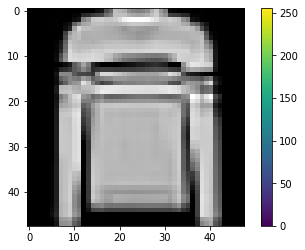

In [6]:
plt.figure()
plt.imshow(rgb_arr_to_3d_1[5])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [7]:

rgb_arr_to_3d_1 = rgb_arr_to_3d_1.astype('float32')/255
#rgb_arr_to_3d_1 /= 255

rgb_arr_to_3d_2 = rgb_arr_to_3d_2.astype('float32')/255
#rgb_arr_to_3d_2 /= 255

#train_images_ = rgb_arr_to_3d_1 / 255.0

#test_images = rgb_arr_to_3d_2 / 255.0

In [8]:
rgb_arr_to_3d_1.dtype

dtype('float32')

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

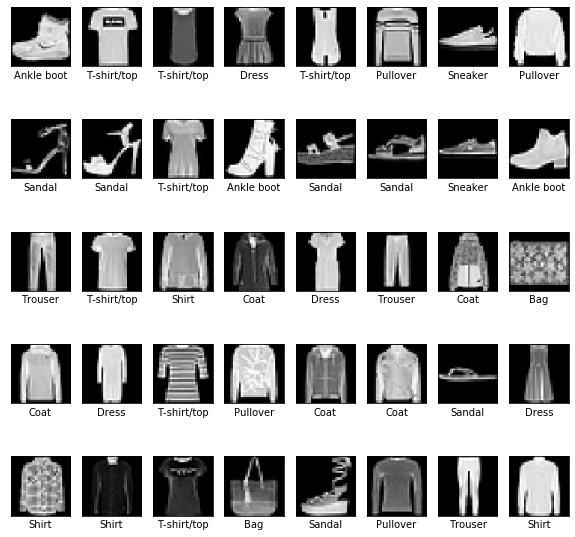

In [9]:
plt.figure(figsize=(10,10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(rgb_arr_to_3d_1[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(rgb_arr_to_3d_1, classes, test_size=0.2, random_state=123)

# Check the data size whether it is as per tensorflow and VGG19 requirement
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [11]:
from keras.layers import Input, Dense
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.models import Model,Sequential

from keras.applications.vgg16 import VGG16

In [27]:
img_rows=48
img_cols=48
num_channel=3

image_input = Input(shape=(img_rows, img_cols, num_channel))

In [28]:
# Create the base model of VGG16
#vgg16 = VGG16(weights='imagenet', include_top=False, input_shape = image_input, classes = 10)
vgg16 = VGG16(input_tensor=image_input, include_top=False, weights='imagenet')

In [29]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [30]:
last_layer = vgg16.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(10, activation='softmax', name='output')(x)
model = Model(image_input, out)

In [31]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [32]:
# freeze all the layers except the dense layers
for layer in model.layers[:-3]:
    layer.trainable = False

In [33]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [41]:
%%time
history = model.fit(X_train, y_train, batch_size=256, epochs=10, verbose=1, validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 798s 17ms/step - loss: 0.6741 - accuracy: 0.7649 - val_loss: 0.5109 - val_accuracy: 0.8202
Epoch 2/10
48000/48000 [==============================] - 803s 17ms/step - loss: 0.4551 - accuracy: 0.8336 - val_loss: 0.4287 - val_accuracy: 0.8439
Epoch 3/10
48000/48000 [==============================] - 643s 13ms/step - loss: 0.4078 - accuracy: 0.8500 - val_loss: 0.3995 - val_accuracy: 0.8581
Epoch 4/10
48000/48000 [==============================] - 537s 11ms/step - loss: 0.3822 - accuracy: 0.8585 - val_loss: 0.3742 - val_accuracy: 0.8649
Epoch 5/10
48000/48000 [==============================] - 576s 12ms/step - loss: 0.3621 - accuracy: 0.8670 - val_loss: 0.4120 - val_accuracy: 0.8537
Epoch 6/10
48000/48000 [==============================] - 577s 12ms/step - loss: 0.3478 - accuracy: 0.8709 - val_loss: 0.3857 - val_accuracy: 0.8600
Epoch 7/10
48000/48000 [==============================] 

In [42]:
(loss, accuracy) = model.evaluate(X_val, y_val, batch_size=256, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

12000/12000 [==============================] - 135s 11ms/step
[INFO] loss=0.3266, accuracy: 88.1750%


Text(0.5, 1.0, 'Train - Accuracy')

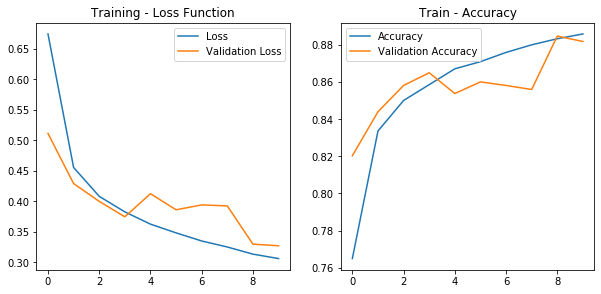

In [43]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [45]:
Y_train_pred = model.predict(X_val)

In [46]:
y_train_pred = np.argmax(Y_train_pred, axis=1)

In [47]:
from sklearn.metrics import confusion_matrix


print(confusion_matrix(np.argmax(y_val, axis=1), y_train_pred))

[[ 999    1   25   44    9    0   95    0   16    0]
 [   2 1128    0   21    2    0    1    0    0    0]
 [  15    3  953   13  134    0   76    0    4    0]
 [  30   13    8 1045   49    0   35    0    2    0]
 [   2    2   56   39 1080    0   42    0    7    0]
 [   0    0    0    0    0 1132    0   63    4   11]
 [ 163    2   70   38  157    0  733    0    7    0]
 [   0    0    0    0    0   27    0 1170    0    5]
 [   6    0    1    5    3    2    9    0 1202    0]
 [   0    0    0    0    0   12    0   85    3 1139]]


In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

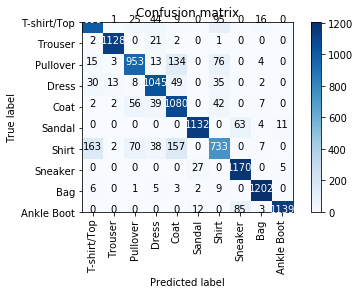

In [51]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(np.argmax(y_val, axis=1), y_train_pred)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])